# Logistic Regression进行二分类

## 1.简单线性二分类 划分平面在几何上是直线

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


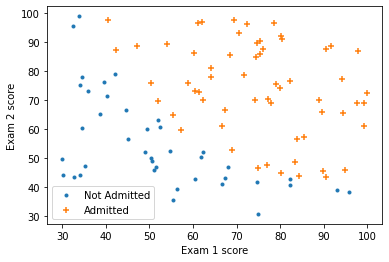

In [2]:
def plotData(filePath,train=False,theta=None):
    data = pd.read_csv(filePath,sep=',',header=None)
    gb = data.groupby(data.iloc[:,-1]) #利用groupby对数据集进行拆分
    for category in list(gb):
        label = category[0]
        if label == 0:
            name = 'Not Admitted'
            shape = '.'
        else:
            name = 'Admitted'
            shape = '+'
        plt.scatter(category[1].iloc[:,0],category[1].iloc[:,1],marker=shape,label=name)
    
    if train == True:
        x = np.linspace(data.iloc[:,0].values.min(),data.iloc[:,0].values.max(),num=10)
        y = -(theta[0]/theta[1])*x - theta[2]/theta[1]
        plt.plot(x,y)

    plt.legend()
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()
    return None

filePath = './ex2data1.txt'
plotData(filePath)

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

sigmoid(0)

0.5

In [4]:
data = pd.read_csv('./ex2data1.txt',sep=',',header=None)
X = data.iloc[:,:-1].values
m,n = X.shape
y = data.iloc[:,-1].values.reshape(-1,1)
theta = np.zeros(n+1) #[theta0,theta1,b] 为了后面使用scipy库，使用1维向量
X = np.c_[X,np.ones((m,1))] #扩充偏差b

In [5]:
#损失函数
def costFunction(theta, X, y):
    m = X.shape[0]
    y_pre = sigmoid(np.dot(X,theta))
    temp1 = np.dot(y.T,np.log(y_pre))*(-1/m)
    temp2 = np.dot((1-y).T,np.log(1-y_pre))*(-1/m)
    return temp1+temp2

costFunction(theta, X, y)

array([0.69314718])

In [6]:
#梯度
def gradient(theta,X,y):
    m,n = X.shape
    theta = theta.reshape(-1,1)
    y_pre = sigmoid(np.dot(X,theta))
    grad = np.dot(X.T,(y_pre-y))/m   # n*1的array
    return grad.flatten()
gradient(theta,X,y)

array([-12.00921659, -11.26284221,  -0.1       ])

In [7]:
import scipy.optimize as op

# 采用scipy优化库进行优化求解
#需要注意的是，op.minimize()函数形参x0必须是一维的，jac的赋值也必须是一维的
def soverOpt(X,y,theta):
    result = op.minimize(fun=costFunction,x0=theta,args=(X,y),method='TNC',jac=gradient)
    print(result)
    return result

result = soverOpt(X,y,theta)
bestTheta = result['x']

    


     fun: array([0.2034977])
     jac: array([1.16974540e-07, 4.86313263e-07, 9.34508114e-09])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([  0.20623159,   0.20147149, -25.16131852])


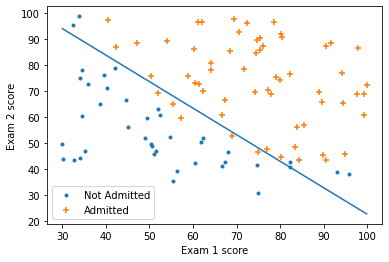

In [8]:
# scipy 优化之后的结果可视化
plotData(filePath,train=True,theta=bestTheta)

# 2.非线性多维+正则化logistic regression

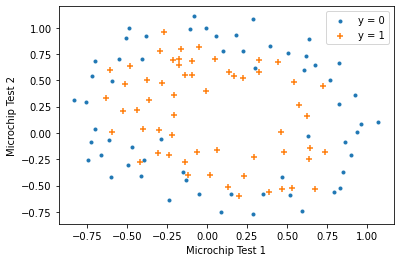

In [38]:
def plotData(filePath,train=False,coord=None):
    data = pd.read_csv(filePath,sep=',',names = ['x1','x2','target'])
    gb = data.groupby(data.iloc[:,-1]) #利用groupby对数据集进行拆分
    for category in list(gb):
        label = category[0]
        if label == 0:
            name = 'y = 0'
            shape = '.'
        else:
            name = 'y = 1'
            shape = '+'
        plt.scatter(category[1].iloc[:,0],category[1].iloc[:,1],marker=shape,label=name)
    
    if train == True:
       plt.scatter(coord[0],coord[1],c='r')

    plt.legend()
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.show()
    return None

filePath = './ex2data2.txt'
plotData(filePath)

In [10]:
# 特征映射：相当于特征工程，扩充更高维的特征
def featureMap(x1,x2,power):
    mapData = {}
    for i in range(power+1):
        for j in range(i+1):
            featureName = str(i-j)+str(j)
            mapData[featureName] = np.power(x1,i-j)*np.power(x2,j)
    mapData = pd.DataFrame(mapData)
    return mapData

data = pd.read_csv(filePath,sep=',',names = ['x1','x2','target'])
x1 = data.iloc[:,0].values
x2 = data.iloc[:,1].values
X = featureMap(x1,x2,6).values
print('featuremap之后的特征数量为:%d'%(X.shape[1]))

featuremap之后的特征数量为:28


In [11]:
#确定输入输出，以及初始化theta
m,n = X.shape
y = data.iloc[:,-1].values.reshape(-1,1)
theta = np.zeros(n) #特征增广的时候已经考虑了偏差，所以不需要n+1


In [18]:
#定义正则化损失函数
def regularized_cost(theta,X,y,l=1):
    regularized_term = l/(2*len(X))*np.power(theta,2).sum()
    return costFunction(theta,X,y) + regularized_term

regularized_cost(theta,X,y,l=1)

array([0.69314718])

In [19]:
def regularized_gradient(theta,X,y,l=1):
    regularized_term = l/len(X)*theta
    return gradient(theta,X,y) + regularized_term

regularized_gradient(theta,X,y,l=1)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [21]:
import scipy.optimize as op

# 采用scipy优化库进行优化求解
#需要注意的是，op.minimize()函数形参x0必须是一维的，jac的赋值也必须是一维的
def regularized_solver(X,y,theta):
    result = op.minimize(fun=regularized_cost,x0=theta,args=(X,y),method='Newton-CG',jac=regularized_gradient)
    print(result)
    return result

result = regularized_solver(X,y,theta)
bestTheta = result['x']

     fun: 0.5351602503809717
     jac: array([-1.65206180e-07,  6.01308072e-08,  5.31188789e-08,  1.94581444e-08,
       -7.97916477e-09, -5.37931133e-09,  3.96246820e-08, -3.88767660e-09,
        1.14144651e-08,  2.65413214e-08,  5.46605770e-09, -5.62589441e-09,
       -1.24358249e-08, -2.91165623e-10,  2.65704870e-08,  2.12644674e-08,
       -2.01137884e-09,  1.72451202e-09,  7.01991187e-10,  6.83574239e-09,
        3.51805565e-08,  1.89916695e-08, -1.05574591e-10,  1.12815176e-09,
       -3.33387335e-09,  3.04989620e-09, -2.22659818e-09,  2.37569564e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 55
  status: 0
 success: True
       x: array([ 1.14213474,  0.60132002,  1.16718293, -1.87174431, -0.91573524,
       -1.26952958,  0.12668379, -0.36873129, -0.3451837 , -0.17377669,
       -1.42386065, -0.04855688, -0.60642101, -0.26931887, -1.1631591 ,
       -0.24310171, -0.20707385, -0.04318437, -0.28028123, -0.28695557,
       -0.4

## 3.可视化决策边界

In [33]:
def feature_mapped_logistic_regression(power,l):
    data = pd.read_csv('./ex2data2.txt',sep=',',names = ['x1','x2','target'])
    x1 = data.iloc[:,0].values
    x2 = data.iloc[:,1].values
    X = featureMap(x1,x2,power).values
    m,n = X.shape
    y = data.iloc[:,-1].values.reshape(-1,1)
    theta = np.zeros(n)
    result = op.minimize(fun=regularized_cost,x0=theta,args=(X,y,l),method='Newton-CG',jac=regularized_gradient)
    return result['x']

theta1 = feature_mapped_logistic_regression(6,1)

    



In [37]:
def find_decision_boundary(density, power, final_theta, threshhold):
    x1 = np.linspace(-1, 1.5, density)
    x2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*cordinates)

    mapped_cord = featureMap(x_cord, y_cord, power)
    pred = np.dot(mapped_cord.values,final_theta) 
    result = mapped_cord[np.abs(pred) < threshhold]
    return result['10'].values,result['01'].values

find_decision_boundary(100,6,theta1,2 * 10**-3)
    


(array([-0.64646465, -0.24242424,  0.16161616,  0.71717172]),
 array([ 0.33838384, -0.44444444, -0.5959596 , -0.16666667]))

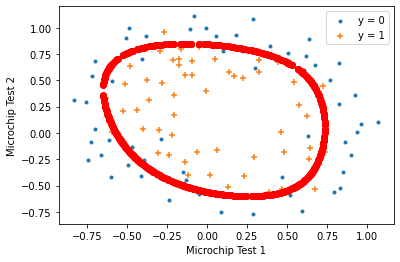

In [40]:
def draw_boundary(power,l):
    density = 1000
    threshhold = 2 * 10**-3
    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)
    plotData('./ex2data2.txt',train=True,coord=(x,y))

    return None

draw_boundary(6,1) #刚刚好
    

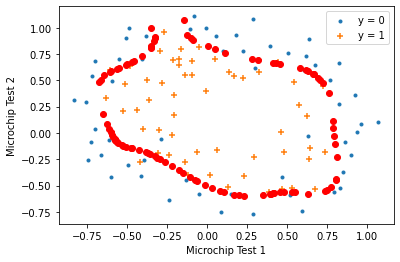

In [44]:
draw_boundary(8,0) #惩罚系数为0，过拟合

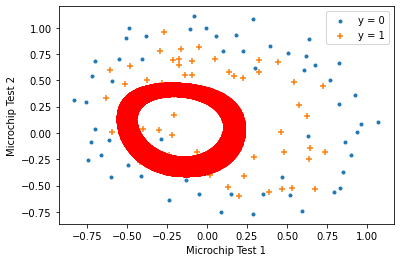

In [42]:
draw_boundary(6,100) #惩罚系数过大，欠拟合